<a href="https://colab.research.google.com/github/kdw9687/CapstonePBL_Predict_Movie/blob/main/Voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Flatten,Activation
from tensorflow.keras.utils import to_categorical
drive.mount('/content/drive')
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import sys
import numpy as np
from sklearn import preprocessing

np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR,SVC
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

Mounted at /content/drive


In [2]:
file='/content/drive/MyDrive/Colab Notebooks/데이터 판다스용완.csv'

In [3]:
data=pd.read_csv(file)

In [4]:
data=data.dropna()

In [5]:
data.drop(columns=['순번','장르','국적.1','연휴 및 기념일 상영 여부','수상'],inplace=True)
data.set_index('영화명',inplace=True)
target=data['전국 관객수']
target.dropna(inplace=True)
x=data.drop(columns=['전국 매출액','전국 관객수'])
y=target

In [6]:
scaler=preprocessing.StandardScaler()
features_to_scale=['전국 스크린수','러닝타임','네티즌 평점']
scale=scaler.fit_transform(data[features_to_scale])
x[features_to_scale]=scale

In [7]:
for i in range(len(y)):
  if y[i]>6000000:
    y[i]=3
  elif y[i]>3000000 and y[i]<=6000000:
    y[i]=2
  elif y[i]>1000000 and y[i]<=3000000:
    y[i]=1
  else:
    y[i]=0
  x=np.array(x)
  y=np.array(y)

In [8]:
model1=SVC(kernel='linear', C=0.06)
model2=GaussianNB(var_smoothing=0.2)
model3=RandomForestClassifier(n_estimators=5000,max_depth=5)
model4=KNeighborsClassifier(n_neighbors=7)
model5=LogisticRegression(C=0.1,multi_class='ovr',solver='lbfgs')
model6=DecisionTreeClassifier(ccp_alpha=0.00615291)
model7=AdaBoostClassifier(n_estimators=10000, random_state=5)
vote_model = VotingClassifier(
    estimators=[('svc',model1),('naive',model2),('forest',model3),('knn',model4),('log',model5),('Tree',model6),('boost',model7)],
    voting='hard')

In [9]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=777,test_size=0.2)
vote_model.fit(x_train,y_train)

VotingClassifier(estimators=[('svc',
                              SVC(C=0.06, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('naive',
                              GaussianNB(priors=None, var_smoothing=0.2)),
                             ('forest',
                              RandomForestClassifier(...
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
   

In [10]:
y_pred=vote_model.predict(x_test)

In [11]:
vote_model.score(x_test,y_test)

0.655

In [12]:
model1=SVC(kernel='linear', C=0.06, probability=True)
model2=GaussianNB(var_smoothing=0.2)
model3=RandomForestClassifier(n_estimators=5000,max_depth=5)
model4=KNeighborsClassifier(n_neighbors=7)
model5=LogisticRegression(C=0.1,multi_class='ovr',solver='lbfgs')
model6=DecisionTreeClassifier(ccp_alpha=0.00615291)
model7 = AdaBoostClassifier(n_estimators=10000, random_state=5)
vote_model = VotingClassifier(
    estimators=[('svc',model1),('naive',model2),('forest',model3),('knn',model4),('log',model5),('Tree',model6),('boost',model7)],
    voting='soft')

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=777,test_size=0.2)
vote_model.fit(x_train,y_train)

VotingClassifier(estimators=[('svc',
                              SVC(C=0.06, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('naive',
                              GaussianNB(priors=None, var_smoothing=0.2)),
                             ('forest',
                              RandomForestClassifier(b...
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
   

In [14]:
vote_model.score(x_test,y_test)

0.67

In [15]:
furious=[[0 for i in range(1,37)]]
furious[0][0]=1
furious[0][1]=1
furious[0][2]=1
furious[0][4]=3.923
furious[0][5]=3
furious[0][19]=1
furious[0][-5]=1
furious[0][-7]=1
furious[0][-8]=1
furious[0][-10]=1.09
furious[0][-11]=1.59
vote_model.predict(furious)

array([2.])

In [16]:
cruela=furious
cruela[0][0]=1
cruela[0][1]=1
cruela[0][2]=1
cruela[0][4]=1.169
cruela[0][5]=3
cruela[0][11]=1
cruela[0][-5]=1
cruela[0][-7]=0
cruela[0][-8]=0
cruela[0][-10]=1.61
cruela[0][-11]=1.06
vote_model.predict(cruela)

array([1.])

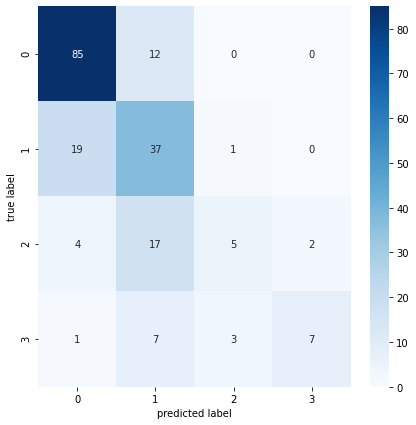

In [17]:
results=vote_model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

plt.figure(figsize=(7,7))
cm=confusion_matrix(y_test,results)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [18]:
print('\n',classification_report(y_test,results))


               precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        97
         1.0       0.51      0.65      0.57        57
         2.0       0.56      0.18      0.27        28
         3.0       0.78      0.39      0.52        18

    accuracy                           0.67       200
   macro avg       0.65      0.52      0.55       200
weighted avg       0.67      0.67      0.65       200

